# Linear Model

接下来演示$y=ax+b$拟合

接下来演示$y = \alpha  + \beta x$拟合

## 生成数据

In [1]:
import numpy as np

In [8]:
x = np.random.random(30)
x

array([0.87690506, 0.51988453, 0.86994711, 0.30291895, 0.43420613,
       0.428719  , 0.70162546, 0.99624358, 0.71299431, 0.17271522,
       0.9063562 , 0.82669642, 0.61565353, 0.56971902, 0.83545873,
       0.62302673, 0.50403612, 0.873966  , 0.80977859, 0.71529737,
       0.56952687, 0.29241889, 0.29474349, 0.46203894, 0.54670562,
       0.61204571, 0.14911949, 0.75862389, 0.26044287, 0.85496616])

In [9]:
x = 10 * x
x

array([8.76905062, 5.19884533, 8.69947114, 3.02918948, 4.34206126,
       4.28718996, 7.01625458, 9.96243583, 7.1299431 , 1.72715223,
       9.06356202, 8.26696422, 6.15653533, 5.69719024, 8.35458725,
       6.23026725, 5.04036119, 8.73965999, 8.09778589, 7.15297371,
       5.69526867, 2.92418891, 2.94743486, 4.62038937, 5.46705624,
       6.12045709, 1.49119488, 7.58623893, 2.60442873, 8.54966164])

In [10]:
y = 20*x + 3
y

array([178.38101239, 106.9769066 , 176.98942285,  63.58378953,
        89.84122511,  88.74379924, 143.32509166, 202.24871666,
       145.59886196,  37.54304468, 184.27124041, 168.33928449,
       126.13070655, 116.94380477, 170.09174502, 127.60534501,
       103.80722372, 177.79319979, 164.95571781, 146.05947421,
       116.90537337,  61.48377814,  61.94869711,  95.4077875 ,
       112.34112487, 125.40914172,  32.8238977 , 154.72477858,
        55.08857451, 173.99323285])

增加扰动项：$y = ax + b + \varepsilon $

In [11]:
y = 20 * x + 3 + np.random.randn(30)
y

array([181.2278562 , 106.6606156 , 176.19843406,  64.45804001,
        89.50067948,  87.27861092, 144.56993014, 203.21109054,
       145.06985699,  37.45332196, 181.921526  , 167.56501086,
       126.39233821, 116.15039604, 170.70195042, 127.91707718,
       105.37411154, 178.89435149, 163.8289792 , 146.32245545,
       115.80368754,  62.29243986,  62.58877222,  93.06812811,
       112.94768398, 125.85196541,  32.47473376, 153.98909192,
        54.20806762, 174.18751507])

## 绘制散点图 

In [12]:
from plotnine import *
import pandas as pd
%matplotlib inline

In [13]:
x_y = pd.DataFrame({'x':x, 'y':y})

In [14]:
x_y.describe()

,x,y
count,30.000000,30.000000
mean,6.032260,123.603624
std,2.368511,47.476850
min,1.491195,32.474734
25%,4.411643,90.392542
50%,6.138496,126.122152
75%,8.224670,166.631003
max,9.962436,203.211091


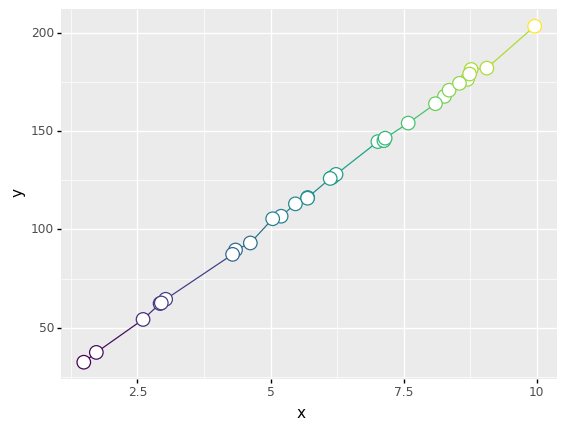

<ggplot: (118628715168)>

In [15]:
(
    ggplot(x_y, aes(x='x', y='y', colour='x+y')) +
    geom_line() +
    geom_point(fill='white', size=5) +
    theme(legend_position='none')
)

## 模型拟合

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()

In [18]:
x = x.reshape(-1, 1)

In [19]:
reg.fit(x, y)

LinearRegression()

In [20]:
print("Fitted lm model is y={:.3}x+{:.3}".format(reg.coef_[0], reg.intercept_))

Fitted lm model is y=20.0x+2.72


## 拟合效果

In [21]:
yhat = reg.predict(x)
yhat

array([178.44737219, 106.90246166, 177.05303852,  63.42377589,
        89.73298961,  88.63339968, 143.32232322, 202.36214218,
       145.60057727,  37.33168021, 184.34921539, 168.38584259,
       126.09403179, 116.88901397, 170.14175886, 127.57157815,
       103.72652836, 177.85840046, 164.99560371, 146.06209782,
       116.85050679,  61.3196234 ,  61.78545916,  95.31052893,
       112.27725785, 125.37104408,  32.60322735, 154.74448966,
        54.91180881, 174.05094021])

In [22]:
x

array([[8.76905062],
       [5.19884533],
       [8.69947114],
       [3.02918948],
       [4.34206126],
       [4.28718996],
       [7.01625458],
       [9.96243583],
       [7.1299431 ],
       [1.72715223],
       [9.06356202],
       [8.26696422],
       [6.15653533],
       [5.69719024],
       [8.35458725],
       [6.23026725],
       [5.04036119],
       [8.73965999],
       [8.09778589],
       [7.15297371],
       [5.69526867],
       [2.92418891],
       [2.94743486],
       [4.62038937],
       [5.46705624],
       [6.12045709],
       [1.49119488],
       [7.58623893],
       [2.60442873],
       [8.54966164]])

In [23]:
x_y_yhat = pd.DataFrame({'x':x.flatten(), 'y':y, 'yhat':yhat})

In [24]:
x_y_yhat_melt = pd.melt(x_y_yhat, id_vars='x', var_name='y_type', value_name='value')
x_y_yhat_melt.head()

,x,y_type,value
0,8.769051,y,181.227856
1,5.198845,y,106.660616
2,8.699471,y,176.198434
3,3.029189,y,64.458040
4,4.342061,y,89.500679


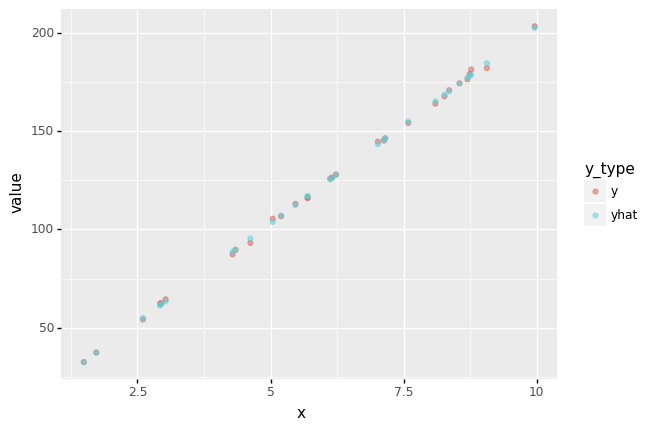

<ggplot: (118628715048)>

In [25]:
(
    ggplot(x_y_yhat_melt, aes(x='x', y='value', colour='y_type')) +
    geom_point(alpha=0.5)
)

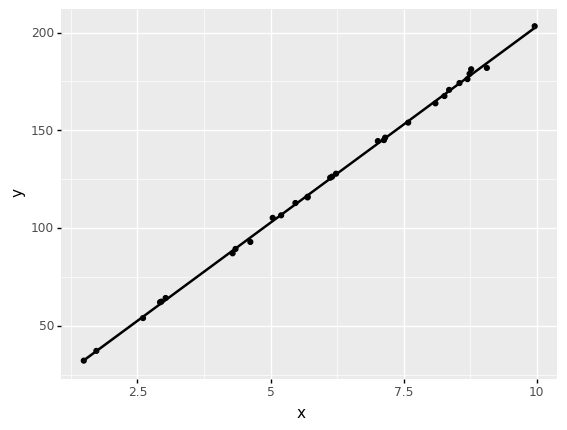

<ggplot: (118629764256)>

In [26]:
(
    ggplot(x_y, aes(x='x', y='y')) +
    geom_point() +
    geom_smooth(method='lm')
)

In [27]:
from statsmodels.api import OLS

In [28]:
lm2 = OLS(x, y).fit()

In [29]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.329e+05
Date:                Tue, 09 Mar 2021   Prob (F-statistic):                    3.52e-58
Time:                        12:01:21   Log-Likelihood:                          36.303
No. Observations:                  30   AIC:                                     -70.61
Df Residuals:                      29   BIC:                                     -69.20
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0489      0.000    482.604      0.000       0.049       0.049
==============================================================================
Omnibus:                        0.424   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.809   Jarque-Bera (JB):                0.485
Skew:                           0.249   Prob(JB):                        0.785
Kurtosis:                       2.628   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""